In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import calendar
#import statsmodels.api as sm
#from statsmodels.tsa.stattools import adfuller
#from prophet import Prophet

In [2]:
#pip install localpip 

In [3]:
#localpip install fbprophet

In [4]:
precipitation= pd.read_csv("C:/Users/SIDY BOY!/Desktop/UTD/Projects/groIntillegenceAssessment/gro_homework/Daily Precipitation.csv")
soilMoisture= pd.read_csv("C:/Users/SIDY BOY!/Desktop/UTD/Projects/groIntillegenceAssessment/gro_homework/Daily Soil Mositure.csv")
temp= pd.read_csv("C:/Users/SIDY BOY!/Desktop/UTD/Projects/groIntillegenceAssessment/gro_homework/Daily Temperature.csv")
ndvi= pd.read_csv("C:/Users/SIDY BOY!/Desktop/UTD/Projects/groIntillegenceAssessment/gro_homework/Eight Day NDVI.csv")
predProduction= pd.read_csv("C:/Users/SIDY BOY!/Desktop/UTD/Projects/groIntillegenceAssessment/gro_homework/predicted_production_qty.csv")
prodQuantity= pd.read_csv("C:/Users/SIDY BOY!/Desktop/UTD/Projects/groIntillegenceAssessment/gro_homework/Production Quantity.csv")

# Preprocessing:

## Precipitation 

In [5]:
precipitation['start_date']= pd.to_datetime(precipitation['start_date'])
precipitation['end_date']= pd.to_datetime(precipitation['end_date'])

In [6]:
precipitation.start_date

0       2014-01-01 00:00:00+00:00
1       2014-01-02 00:00:00+00:00
2       2014-01-03 00:00:00+00:00
3       2014-01-04 00:00:00+00:00
4       2014-01-05 00:00:00+00:00
                   ...           
29935   2022-03-09 00:00:00+00:00
29936   2022-03-10 00:00:00+00:00
29937   2022-03-11 00:00:00+00:00
29938   2022-03-12 00:00:00+00:00
29939   2022-03-13 00:00:00+00:00
Name: start_date, Length: 29940, dtype: datetime64[ns, UTC]

In [7]:
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29940 entries, 0 to 29939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  29940 non-null  datetime64[ns, UTC]
 1   end_date    29940 non-null  datetime64[ns, UTC]
 2   precip      29940 non-null  float64            
 3   region_id   29940 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(1)
memory usage: 935.8 KB


In [8]:
p_monthly = precipitation.groupby(['start_date','region_id']).mean()

In [9]:
p_monthly

precip
start_date                region_id          
2014-01-01 00:00:00+00:00 93         1.392393
                          94         0.164493
                          95         0.038271
                          97         0.249000
                          98         0.259836
...                                       ...
2022-03-13 00:00:00+00:00 99         7.774215
                          102        5.607843
                          103        7.131195
                          104        1.479289
                          105        2.719724

[29940 rows x 1 columns]

In [10]:
p_monthly.reset_index(inplace=True)

In [11]:
p_monthly

,start_date,region_id,precip
0,2014-01-01 00:00:00+00:00,93,1.392393
1,2014-01-01 00:00:00+00:00,94,0.164493
2,2014-01-01 00:00:00+00:00,95,0.038271
3,2014-01-01 00:00:00+00:00,97,0.249000
4,2014-01-01 00:00:00+00:00,98,0.259836
...,...,...,...
29935,2022-03-13 00:00:00+00:00,99,7.774215
29936,2022-03-13 00:00:00+00:00,102,5.607843
29937,2022-03-13 00:00:00+00:00,103,7.131195
29938,2022-03-13 00:00:00+00:00,104,1.479289


In [12]:
p_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29940 entries, 0 to 29939
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  29940 non-null  datetime64[ns, UTC]
 1   region_id   29940 non-null  int64              
 2   precip      29940 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 701.8 KB


In [13]:
#p_monthly['start_date'] = pd.to_datetime(p_monthly['start_date'])
#precipitation['end_date']= pd.to_datetime(precipitation['end_date'])
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29940 entries, 0 to 29939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  29940 non-null  datetime64[ns, UTC]
 1   end_date    29940 non-null  datetime64[ns, UTC]
 2   precip      29940 non-null  float64            
 3   region_id   29940 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(1)
memory usage: 935.8 KB


In [14]:
p_final  = p_monthly.groupby([p_monthly.start_date.dt.year,precipitation.end_date.dt.month,p_monthly.region_id])['precip'].mean().sort_values()

In [15]:
p_final

start_date  end_date  region_id
2022        2         95            0.388264
            7         97            0.402670
            8         105           0.463411
            11        105           0.541400
            7         93            0.561234
                                     ...    
            5         103          20.792050
            12        103          21.136716
            9         95           25.246745
            4         93           35.651439
            10        105          62.289118
Name: precip, Length: 1080, dtype: float64

In [16]:
#p_final.value_counts()

In [17]:
#p_final=precipitation.groupby([precipitation.start_date.dt.year,precipitation.end_date.dt.month,precipitation.region_id])['precip'].mean().sort_values()

In [18]:
#p_final

In [19]:
p_final = pd.DataFrame(p_final)

In [20]:
p_final

precip
start_date end_date region_id           
2022       2        95          0.388264
           7        97          0.402670
           8        105         0.463411
           11       105         0.541400
           7        93          0.561234
...                                  ...
           5        103        20.792050
           12       103        21.136716
           9        95         25.246745
           4        93         35.651439
           10       105        62.289118

[1080 rows x 1 columns]

In [21]:
p_final.reset_index(inplace= True)

In [22]:
p_final.rename(columns={'start_date': 'year', 'end_date': 'month'}, inplace=True)

In [23]:
p_final.year.value_counts()

2014    120
2015    120
2016    120
2017    120
2018    120
2019    120
2020    120
2021    120
2022    120
Name: year, dtype: int64

In [24]:
p_final

,year,month,region_id,precip
0,2022,2,95,0.388264
1,2022,7,97,0.402670
2,2022,8,105,0.463411
3,2022,11,105,0.541400
4,2022,7,93,0.561234
...,...,...,...,...
1075,2022,5,103,20.792050
1076,2022,12,103,21.136716
1077,2022,9,95,25.246745
1078,2022,4,93,35.651439


## temp

In [25]:
temp["start_date"] =pd.to_datetime(temp["start_date"])
temp["end_date"] =pd.to_datetime(temp["end_date"])

In [26]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12930 entries, 0 to 12929
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  12930 non-null  datetime64[ns, UTC]
 1   end_date    12930 non-null  datetime64[ns, UTC]
 2   temp        12930 non-null  float64            
 3   region_id   12930 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(1)
memory usage: 404.2 KB


In [27]:
#t_final=temp.groupby([temp.start_date.dt.year,temp.end_date.dt.month,temp.region_id])['temp'].mean().sort_values()

In [28]:
#t_final

In [29]:
t_monthly = temp.groupby(['start_date','region_id']).mean()

In [30]:
t_monthly

temp
start_date                region_id           
2014-01-01 00:00:00+00:00 99         22.907194
                          104        23.420439
2014-01-02 00:00:00+00:00 93         24.707605
                          94         26.872795
                          97         26.789636
...                                        ...
2022-03-13 00:00:00+00:00 98         27.564093
                          99         29.314126
                          102        26.473257
                          104        29.985432
                          105        26.088818

[12930 rows x 1 columns]

In [31]:
t_monthly.reset_index(inplace=True)

In [32]:
t_monthly

,start_date,region_id,temp
0,2014-01-01 00:00:00+00:00,99,22.907194
1,2014-01-01 00:00:00+00:00,104,23.420439
2,2014-01-02 00:00:00+00:00,93,24.707605
3,2014-01-02 00:00:00+00:00,94,26.872795
4,2014-01-02 00:00:00+00:00,97,26.789636
...,...,...,...
12925,2022-03-13 00:00:00+00:00,98,27.564093
12926,2022-03-13 00:00:00+00:00,99,29.314126
12927,2022-03-13 00:00:00+00:00,102,26.473257
12928,2022-03-13 00:00:00+00:00,104,29.985432


In [33]:
t_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12930 entries, 0 to 12929
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  12930 non-null  datetime64[ns, UTC]
 1   region_id   12930 non-null  int64              
 2   temp        12930 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 303.2 KB


In [34]:
t_final  = t_monthly.groupby([t_monthly.start_date.dt.year,temp.end_date.dt.month,t_monthly.region_id])['temp'].mean().sort_values()

In [35]:
t_final

start_date  end_date  region_id
2014        11        95           22.467984
            10        102          23.612769
2016        1         103          23.618755
2014        12        105          23.649273
            4         103          23.704996
                                     ...    
2022        2         104          30.501378
2018        10        104          30.604619
            7         104          30.605962
2022        3         104          30.647493
2014        8         94           31.117683
Name: temp, Length: 1078, dtype: float64

In [36]:
t_final = pd.DataFrame(t_final)

In [37]:
t_final

temp
start_date end_date region_id           
2014       11       95         22.467984
           10       102        23.612769
2016       1        103        23.618755
2014       12       105        23.649273
           4        103        23.704996
...                                  ...
2022       2        104        30.501378
2018       10       104        30.604619
           7        104        30.605962
2022       3        104        30.647493
2014       8        94         31.117683

[1078 rows x 1 columns]

In [38]:
t_final.reset_index(inplace= True)

In [39]:
t_final.rename(columns={'start_date': 'year', 'end_date': 'month'}, inplace=True)

In [40]:
t_final.year.value_counts()

2014    120
2015    120
2016    120
2017    120
2018    120
2019    120
2020    120
2021    120
2022    118
Name: year, dtype: int64

In [41]:
t_final

,year,month,region_id,temp
0,2014,11,95,22.467984
1,2014,10,102,23.612769
2,2016,1,103,23.618755
3,2014,12,105,23.649273
4,2014,4,103,23.704996
...,...,...,...,...
1073,2022,2,104,30.501378
1074,2018,10,104,30.604619
1075,2018,7,104,30.605962
1076,2022,3,104,30.647493


## soil Moisture

In [42]:
soilMoisture["start_date"] =pd.to_datetime(soilMoisture["start_date"])
soilMoisture["end_date"] =pd.to_datetime(soilMoisture["end_date"])

In [43]:
soilMoisture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29603 entries, 0 to 29602
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  29603 non-null  datetime64[ns, UTC]
 1   end_date    29603 non-null  datetime64[ns, UTC]
 2   smos        29603 non-null  float64            
 3   region_id   29603 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(1)
memory usage: 925.2 KB


In [44]:
#sm_final=soilMoisture.groupby([soilMoisture.start_date.dt.year,soilMoisture.end_date.dt.month,soilMoisture.region_id])['smos'].mean().sort_values()

In [45]:
#sm_final

In [46]:
sm_monthly = soilMoisture.groupby(['start_date','region_id']).mean()

In [47]:
sm_monthly

smos
start_date                region_id          
2014-01-01 00:00:00+00:00 93         0.310787
                          94         0.218502
                          95         0.141523
                          97         0.223464
                          98         0.198103
...                                       ...
2022-03-06 00:00:00+00:00 99         0.360346
                          102        0.401018
                          103        0.351322
                          104        0.476161
                          105        0.442624

[29603 rows x 1 columns]

In [48]:
sm_monthly.reset_index(inplace=True)

In [49]:
sm_monthly

,start_date,region_id,smos
0,2014-01-01 00:00:00+00:00,93,0.310787
1,2014-01-01 00:00:00+00:00,94,0.218502
2,2014-01-01 00:00:00+00:00,95,0.141523
3,2014-01-01 00:00:00+00:00,97,0.223464
4,2014-01-01 00:00:00+00:00,98,0.198103
...,...,...,...
29598,2022-03-06 00:00:00+00:00,99,0.360346
29599,2022-03-06 00:00:00+00:00,102,0.401018
29600,2022-03-06 00:00:00+00:00,103,0.351322
29601,2022-03-06 00:00:00+00:00,104,0.476161


In [50]:
sm_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29603 entries, 0 to 29602
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  29603 non-null  datetime64[ns, UTC]
 1   region_id   29603 non-null  int64              
 2   smos        29603 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 693.9 KB


In [51]:
sm_final  = sm_monthly.groupby([sm_monthly.start_date.dt.year,soilMoisture.end_date.dt.month,sm_monthly.region_id])['smos'].mean().sort_values()

In [52]:
sm_final

start_date  end_date  region_id
2016        5         105          0.101151
            6         105          0.111938
2017        4         105          0.116675
2016        9         105          0.118582
            8         105          0.118826
                                     ...   
2022        1         94           0.483228
            9         95           0.484678
            11        95           0.488915
            4         105          0.489983
            11        105          0.516103
Name: smos, Length: 1080, dtype: float64

In [53]:
sm_final = pd.DataFrame(sm_final)

In [54]:
sm_final

smos
start_date end_date region_id          
2016       5        105        0.101151
           6        105        0.111938
2017       4        105        0.116675
2016       9        105        0.118582
           8        105        0.118826
...                                 ...
2022       1        94         0.483228
           9        95         0.484678
           11       95         0.488915
           4        105        0.489983
           11       105        0.516103

[1080 rows x 1 columns]

In [55]:
sm_final.reset_index(inplace= True)

In [56]:
sm_final.rename(columns={'start_date': 'year', 'end_date': 'month'}, inplace=True)

In [57]:
t_final.year.value_counts()

2014    120
2015    120
2016    120
2017    120
2018    120
2019    120
2020    120
2021    120
2022    118
Name: year, dtype: int64

In [58]:
sm_final

,year,month,region_id,smos
0,2016,5,105,0.101151
1,2016,6,105,0.111938
2,2017,4,105,0.116675
3,2016,9,105,0.118582
4,2016,8,105,0.118826
...,...,...,...,...
1075,2022,1,94,0.483228
1076,2022,9,95,0.484678
1077,2022,11,95,0.488915
1078,2022,4,105,0.489983


## ndvi

In [59]:
ndvi["start_date"] =pd.to_datetime(ndvi["start_date"])
ndvi["end_date"] =pd.to_datetime(ndvi["end_date"])

In [60]:
ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  3338 non-null   datetime64[ns, UTC]
 1   end_date    3338 non-null   datetime64[ns, UTC]
 2   ndvi        3338 non-null   float64            
 3   region_id   3338 non-null   int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(1)
memory usage: 104.4 KB


In [61]:
#sm_final=soilMoisture.groupby([soilMoisture.start_date.dt.year,soilMoisture.end_date.dt.month,soilMoisture.region_id])['smos'].mean().sort_values()

In [62]:
#sm_final

In [63]:
ndvi_monthly = ndvi.groupby(['start_date','region_id']).mean()

In [64]:
ndvi_monthly

ndvi
start_date                region_id          
2013-12-27 00:00:00+00:00 93         0.679106
                          94         0.749433
                          97         0.751093
                          99         0.784205
                          102        0.759486
...                                       ...
2022-03-06 00:00:00+00:00 99         0.816218
                          102        0.828617
                          103        0.814690
                          104        0.788102
                          105        0.795875

[3338 rows x 1 columns]

In [65]:
ndvi_monthly.reset_index(inplace=True)

In [66]:
ndvi_monthly

,start_date,region_id,ndvi
0,2013-12-27 00:00:00+00:00,93,0.679106
1,2013-12-27 00:00:00+00:00,94,0.749433
2,2013-12-27 00:00:00+00:00,97,0.751093
3,2013-12-27 00:00:00+00:00,99,0.784205
4,2013-12-27 00:00:00+00:00,102,0.759486
...,...,...,...
3333,2022-03-06 00:00:00+00:00,99,0.816218
3334,2022-03-06 00:00:00+00:00,102,0.828617
3335,2022-03-06 00:00:00+00:00,103,0.814690
3336,2022-03-06 00:00:00+00:00,104,0.788102


In [67]:
ndvi_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  3338 non-null   datetime64[ns, UTC]
 1   region_id   3338 non-null   int64              
 2   ndvi        3338 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 78.4 KB


In [68]:
ndvi_final  = ndvi_monthly.groupby([ndvi_monthly.start_date.dt.year,ndvi.end_date.dt.month,ndvi_monthly.region_id])['ndvi'].mean().sort_values()

In [69]:
ndvi_final

start_date  end_date  region_id
2013        1         93           0.679106
2015        1         94           0.692000
2020        4         94           0.701599
2014        1         104          0.706052
2015        3         104          0.711275
                                     ...   
2021        8         102          0.845086
            2         102          0.847621
            6         102          0.848714
2020        2         102          0.849320
2022        11        102          0.852985
Name: ndvi, Length: 997, dtype: float64

In [70]:
ndvi_final = pd.DataFrame(ndvi_final)

In [71]:
ndvi_final

ndvi
start_date end_date region_id          
2013       1        93         0.679106
2015       1        94         0.692000
2020       4        94         0.701599
2014       1        104        0.706052
2015       3        104        0.711275
...                                 ...
2021       8        102        0.845086
           2        102        0.847621
           6        102        0.848714
2020       2        102        0.849320
2022       11       102        0.852985

[997 rows x 1 columns]

In [72]:
ndvi_final.reset_index(inplace= True)

In [73]:
ndvi_final.rename(columns={'start_date': 'year', 'end_date': 'month'}, inplace=True)

In [74]:
ndvi_final.month.value_counts()

2     89
1     88
7     85
8     85
9     85
10    85
3     83
4     82
6     81
5     79
12    79
11    76
Name: month, dtype: int64

In [75]:
ndvi_final

,year,month,region_id,ndvi
0,2013,1,93,0.679106
1,2015,1,94,0.692000
2,2020,4,94,0.701599
3,2014,1,104,0.706052
4,2015,3,104,0.711275
...,...,...,...,...
992,2021,8,102,0.845086
993,2021,2,102,0.847621
994,2021,6,102,0.848714
995,2020,2,102,0.849320


## Combining columns

In [76]:
merged_pt= pd.merge(p_final, t_final, how='outer')

In [77]:
merged_ptsm= pd.merge(merged_pt, sm_final, how='outer')  

In [78]:
merged_final= pd.merge(merged_ptsm, ndvi_final, how='outer')

In [79]:
merged_final

,year,month,region_id,precip,temp,smos,ndvi
0,2022,2,95,0.388264,25.936712,0.329733,0.819363
1,2022,7,97,0.402670,25.749297,0.339820,0.823187
2,2022,8,105,0.463411,25.559223,0.435346,NaN
3,2022,11,105,0.541400,28.264162,0.516103,NaN
4,2022,7,93,0.561234,28.047148,0.396084,0.804831
...,...,...,...,...,...,...,...
1082,2013,2,103,NaN,NaN,NaN,0.747496
1083,2013,1,94,NaN,NaN,NaN,0.749433
1084,2013,1,97,NaN,NaN,NaN,0.751093
1085,2013,2,102,NaN,NaN,NaN,0.759486


In [80]:
merged_final.isna().sum()

year          0
month         0
region_id     0
precip        7
temp          9
smos          7
ndvi         90
dtype: int64

In [81]:
#merged_final.dropna(inplace= True)
merged_final['temp'] = merged_final['temp'].fillna(method='ffill')
merged_final['precip'] = merged_final['precip'].fillna(method='ffill')
merged_final['smos'] = merged_final['smos'].fillna(method='ffill')
merged_final['ndvi'] = merged_final['ndvi'].fillna(method='ffill')

In [82]:
merged_final.sort_values(by=['year','month'], inplace=True)

In [83]:
merged_final

,year,month,region_id,precip,temp,smos,ndvi
1080,2013,1,93,62.289118,25.897349,0.420721,0.679106
1083,2013,1,94,62.289118,25.897349,0.420721,0.749433
1084,2013,1,97,62.289118,25.897349,0.420721,0.751093
1086,2013,1,99,62.289118,25.897349,0.420721,0.784205
1081,2013,2,104,62.289118,25.897349,0.420721,0.741480
...,...,...,...,...,...,...,...
743,2022,12,94,8.226216,27.084364,0.329550,0.779159
758,2022,12,105,8.304482,23.906103,0.383207,0.816595
858,2022,12,104,9.179220,28.595326,0.378886,0.779843
974,2022,12,102,10.636147,25.847789,0.381265,0.770940


In [84]:
merged_final.reset_index(inplace=True, drop= True)

In [85]:
merged_final

,year,month,region_id,precip,temp,smos,ndvi
0,2013,1,93,62.289118,25.897349,0.420721,0.679106
1,2013,1,94,62.289118,25.897349,0.420721,0.749433
2,2013,1,97,62.289118,25.897349,0.420721,0.751093
3,2013,1,99,62.289118,25.897349,0.420721,0.784205
4,2013,2,104,62.289118,25.897349,0.420721,0.741480
...,...,...,...,...,...,...,...
1082,2022,12,94,8.226216,27.084364,0.329550,0.779159
1083,2022,12,105,8.304482,23.906103,0.383207,0.816595
1084,2022,12,104,9.179220,28.595326,0.378886,0.779843
1085,2022,12,102,10.636147,25.847789,0.381265,0.770940


In [86]:
merged_final

,year,month,region_id,precip,temp,smos,ndvi
0,2013,1,93,62.289118,25.897349,0.420721,0.679106
1,2013,1,94,62.289118,25.897349,0.420721,0.749433
2,2013,1,97,62.289118,25.897349,0.420721,0.751093
3,2013,1,99,62.289118,25.897349,0.420721,0.784205
4,2013,2,104,62.289118,25.897349,0.420721,0.741480
...,...,...,...,...,...,...,...
1082,2022,12,94,8.226216,27.084364,0.329550,0.779159
1083,2022,12,105,8.304482,23.906103,0.383207,0.816595
1084,2022,12,104,9.179220,28.595326,0.378886,0.779843
1085,2022,12,102,10.636147,25.847789,0.381265,0.770940


In [87]:
#merged_final["date"] = merged_final["year"].astype(str) + merged_final["month"].astypepe(str)

In [88]:
merged_final['date'] = pd.to_datetime(merged_final[['year', 'month']].assign(DAY=1))

In [89]:
merged_final

,year,month,region_id,precip,temp,smos,ndvi,date
0,2013,1,93,62.289118,25.897349,0.420721,0.679106,2013-01-01
1,2013,1,94,62.289118,25.897349,0.420721,0.749433,2013-01-01
2,2013,1,97,62.289118,25.897349,0.420721,0.751093,2013-01-01
3,2013,1,99,62.289118,25.897349,0.420721,0.784205,2013-01-01
4,2013,2,104,62.289118,25.897349,0.420721,0.741480,2013-02-01
...,...,...,...,...,...,...,...,...
1082,2022,12,94,8.226216,27.084364,0.329550,0.779159,2022-12-01
1083,2022,12,105,8.304482,23.906103,0.383207,0.816595,2022-12-01
1084,2022,12,104,9.179220,28.595326,0.378886,0.779843,2022-12-01
1085,2022,12,102,10.636147,25.847789,0.381265,0.770940,2022-12-01


In [90]:
merged_final.drop(columns= ['year', 'month'], inplace= True)

In [91]:
merged_final

,region_id,precip,temp,smos,ndvi,date
0,93,62.289118,25.897349,0.420721,0.679106,2013-01-01
1,94,62.289118,25.897349,0.420721,0.749433,2013-01-01
2,97,62.289118,25.897349,0.420721,0.751093,2013-01-01
3,99,62.289118,25.897349,0.420721,0.784205,2013-01-01
4,104,62.289118,25.897349,0.420721,0.741480,2013-02-01
...,...,...,...,...,...,...
1082,94,8.226216,27.084364,0.329550,0.779159,2022-12-01
1083,105,8.304482,23.906103,0.383207,0.816595,2022-12-01
1084,104,9.179220,28.595326,0.378886,0.779843,2022-12-01
1085,102,10.636147,25.847789,0.381265,0.770940,2022-12-01


## Production quantity 

In [92]:
prodQuantity['start_date']= pd.to_datetime(prodQuantity['start_date'])
#prodQuantity['end_date']= pd.to_datetime(prodQuantity['end_date'].dt.date)

In [93]:
prodQuantity['start_date']= pd.to_datetime(prodQuantity['start_date'].dt.date)

In [94]:
prodQuantity.describe()

,prod,region_id
count,720.000000,720.00000
mean,159014.201389,99.00000
std,142882.722751,4.10163
min,10215.000000,93.00000
25%,35445.500000,95.00000
50%,91945.500000,98.50000
75%,269946.000000,103.00000
max,593579.000000,105.00000


In [95]:
prodQuantity.drop(columns= ['end_date'], inplace=True)

In [96]:
prodQuantity

,start_date,prod,region_id
0,2015-01-01,171725,93
1,2015-02-01,188325,93
2,2015-03-01,247856,93
3,2015-04-01,282791,93
4,2015-05-01,291057,93
...,...,...,...
715,2020-08-01,57818,105
716,2020-09-01,57474,105
717,2020-10-01,51821,105
718,2020-11-01,44947,105


In [97]:
prodQuantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  720 non-null    datetime64[ns]
 1   prod        720 non-null    int64         
 2   region_id   720 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 17.0 KB


In [98]:
prodQuantity.rename(columns={'start_date': 'date'}, inplace=True)

In [99]:
prodQuantity.isna().sum()

date         0
prod         0
region_id    0
dtype: int64

In [100]:
grand_df= pd.merge(prodQuantity, merged_final, how='outer')

In [101]:
grand_df

,date,prod,region_id,precip,temp,smos,ndvi
0,2015-01-01,171725.0,93,8.105951,25.883581,0.321010,0.777386
1,2015-02-01,188325.0,93,5.078946,26.345899,0.337278,0.784046
2,2015-03-01,247856.0,93,6.581680,27.090928,0.319188,0.758216
3,2015-04-01,282791.0,93,5.747249,26.513820,0.288980,0.774054
4,2015-05-01,291057.0,93,4.953158,26.853902,0.239058,0.725058
...,...,...,...,...,...,...,...
1082,2022-12-01,NaN,94,8.226216,27.084364,0.329550,0.779159
1083,2022-12-01,NaN,105,8.304482,23.906103,0.383207,0.816595
1084,2022-12-01,NaN,104,9.179220,28.595326,0.378886,0.779843
1085,2022-12-01,NaN,102,10.636147,25.847789,0.381265,0.770940


In [102]:
#grand_df. dropna(inplace= True)
grand_df['prod'].fillna(value=0, inplace=True)


In [103]:
grand_df.isna().sum()

date         0
prod         0
region_id    0
precip       0
temp         0
smos         0
ndvi         0
dtype: int64

In [104]:
cr=grand_df.corr()

<AxesSubplot:>

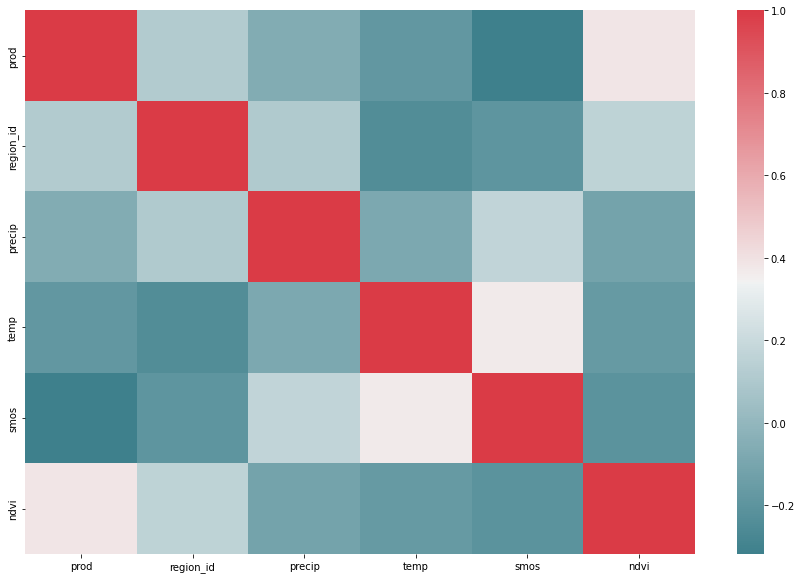

In [105]:
plt.figure(figsize=(15,10))
sns.heatmap(cr, cmap= sns.diverging_palette(210,10, as_cmap=True))

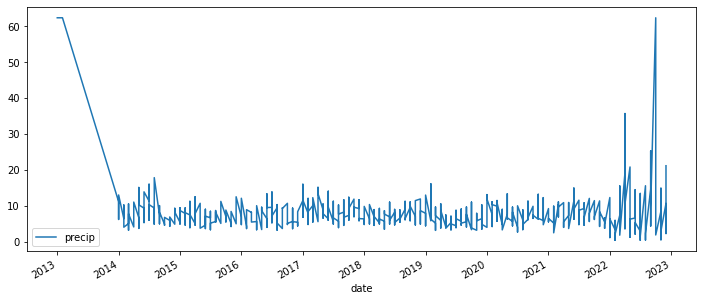

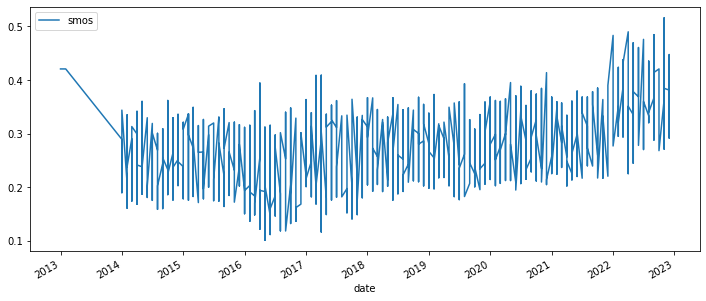

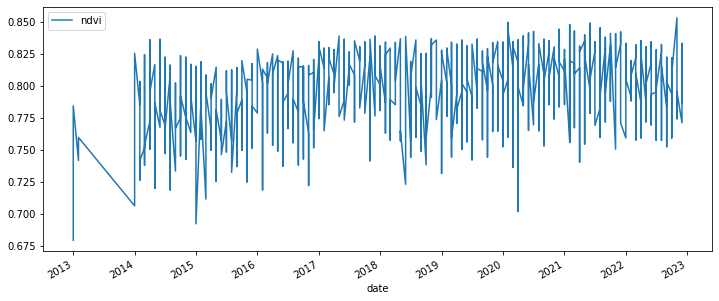

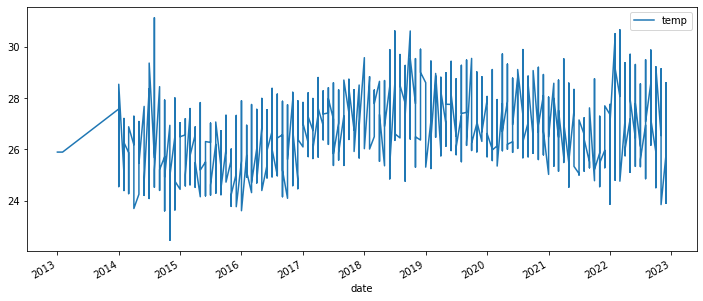

In [106]:
grand_df.plot('date','precip',figsize=(12, 5))
grand_df.plot('date','smos',figsize=(12, 5))
grand_df.plot('date','ndvi',figsize=(12, 5))
grand_df.plot('date','temp',figsize=(12, 5))
plt.show()

### Checking for stationarity in the data

In [107]:
from statsmodels.tsa.stattools import adfuller


test_results = adfuller(grand_df["precip"])

print(f"ADF test statistic: {test_results[0]}")
print(f"p-value: {test_results[1]}")
print("Critical thresholds:")

for key, value in test_results[4].items():
    print(f"\t{key}: {value}")

ADF test statistic: -6.785104597337256
p-value: 2.443452400322918e-09
Critical thresholds:
	1%: -3.4365050530846846
	5%: -2.864257662806096
	10%: -2.568216983623179


In [108]:
test_results = adfuller(grand_df["smos"])

print(f"ADF test statistic: {test_results[0]}")
print(f"p-value: {test_results[1]}")
print("Critical thresholds:")

for key, value in test_results[4].items():
    print(f"\t{key}: {value}")

ADF test statistic: -2.885766535971978
p-value: 0.047028368055601726
Critical thresholds:
	1%: -3.436510851955201
	5%: -2.864260220574562
	10%: -2.5682183458999943


In [109]:
test_results = adfuller(grand_df["temp"])

print(f"ADF test statistic: {test_results[0]}")
print(f"p-value: {test_results[1]}")
print("Critical thresholds:")

for key, value in test_results[4].items():
    print(f"\t{key}: {value}")

ADF test statistic: -5.0944964468863025
p-value: 1.4380654054407717e-05
Critical thresholds:
	1%: -3.436419361753321
	5%: -2.864219865461312
	10%: -2.5681968527091907


In [110]:
test_results = adfuller(grand_df["ndvi"])

print(f"ADF test statistic: {test_results[0]}")
print(f"p-value: {test_results[1]}")
print("Critical thresholds:")

for key, value in test_results[4].items():
    print(f"\t{key}: {value}")

ADF test statistic: -4.270341469639451
p-value: 0.0004997815531763821
Critical thresholds:
	1%: -3.4364476591811033
	5%: -2.864232347211692
	10%: -2.5682035004867494


<AxesSubplot:xlabel='date'>

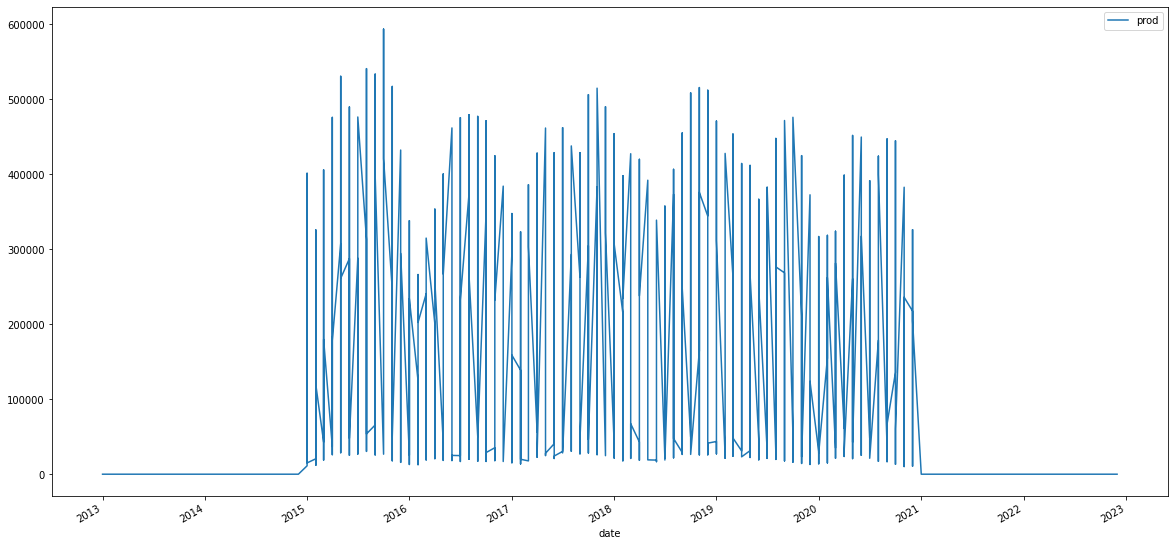

In [112]:
#grand_df.plot(figsize=(20, 10))
#plt.show()
grand_df.plot(x="date", y= 'prod', figsize=(20,10))

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

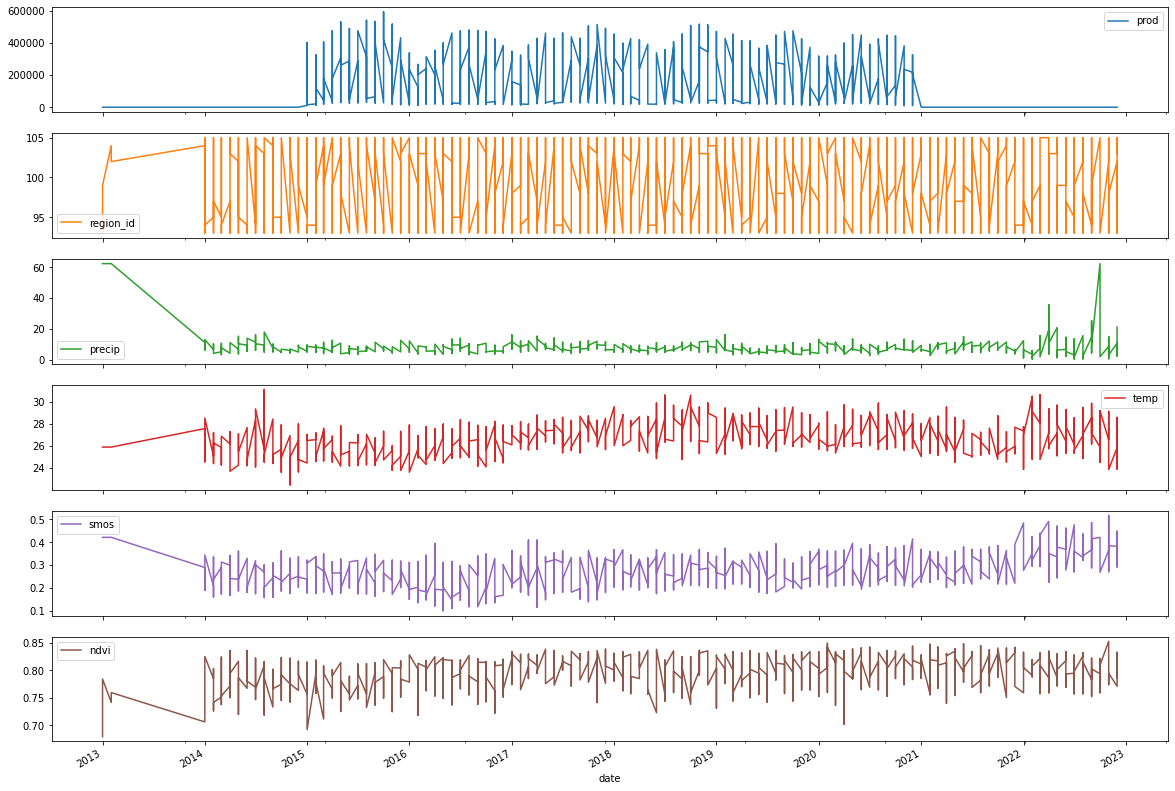

In [113]:
grand_df.plot(x="date",subplots= True, figsize=(20,15))

In [114]:
grand_df

,date,prod,region_id,precip,temp,smos,ndvi
0,2015-01-01,171725.0,93,8.105951,25.883581,0.321010,0.777386
1,2015-02-01,188325.0,93,5.078946,26.345899,0.337278,0.784046
2,2015-03-01,247856.0,93,6.581680,27.090928,0.319188,0.758216
3,2015-04-01,282791.0,93,5.747249,26.513820,0.288980,0.774054
4,2015-05-01,291057.0,93,4.953158,26.853902,0.239058,0.725058
...,...,...,...,...,...,...,...
1082,2022-12-01,0.0,94,8.226216,27.084364,0.329550,0.779159
1083,2022-12-01,0.0,105,8.304482,23.906103,0.383207,0.816595
1084,2022-12-01,0.0,104,9.179220,28.595326,0.378886,0.779843
1085,2022-12-01,0.0,102,10.636147,25.847789,0.381265,0.770940


In [115]:
final_df = grand_df.rename({'date':'ds','prod':'y'},axis='columns')

In [116]:
final_df

,ds,y,region_id,precip,temp,smos,ndvi
0,2015-01-01,171725.0,93,8.105951,25.883581,0.321010,0.777386
1,2015-02-01,188325.0,93,5.078946,26.345899,0.337278,0.784046
2,2015-03-01,247856.0,93,6.581680,27.090928,0.319188,0.758216
3,2015-04-01,282791.0,93,5.747249,26.513820,0.288980,0.774054
4,2015-05-01,291057.0,93,4.953158,26.853902,0.239058,0.725058
...,...,...,...,...,...,...,...
1082,2022-12-01,0.0,94,8.226216,27.084364,0.329550,0.779159
1083,2022-12-01,0.0,105,8.304482,23.906103,0.383207,0.816595
1084,2022-12-01,0.0,104,9.179220,28.595326,0.378886,0.779843
1085,2022-12-01,0.0,102,10.636147,25.847789,0.381265,0.770940


In [117]:
train = final_df[(final_df['ds'] >= '2015-01-01') & (final_df['ds'] <= '2019-12-01')]
test = final_df[(final_df['ds'] >= '2019-12-01') & (final_df['ds'] <= '2020-12-01')]
future = final_df[(final_df['ds'] > '2020-12-01')]

In [118]:
train = train.set_index('ds')

In [119]:
train.drop(columns=['region_id'], inplace= True)

In [120]:
train

,y,precip,temp,smos,ndvi
ds,,,,,
2015-01-01,171725.0,8.105951,25.883581,0.321010,0.777386
2015-02-01,188325.0,5.078946,26.345899,0.337278,0.784046
2015-03-01,247856.0,6.581680,27.090928,0.319188,0.758216
2015-04-01,282791.0,5.747249,26.513820,0.288980,0.774054
2015-05-01,291057.0,4.953158,26.853902,0.239058,0.725058
...,...,...,...,...,...
2019-08-01,51640.0,5.201080,26.805311,0.253114,0.808299
2019-09-01,52965.0,8.126292,28.305322,0.269078,0.788826
2019-10-01,52760.0,11.031046,27.509915,0.267233,0.815097


In [121]:
test = test.set_index('ds')

In [122]:
test

,y,region_id,precip,temp,smos,ndvi
ds,,,,,,
2019-12-01,201989.0,93,7.067414,28.021208,0.359021,0.801414
2020-01-01,184890.0,93,4.260707,27.414849,0.368274,0.820334
2020-02-01,228046.0,93,5.246320,28.071139,0.349117,0.810050
2020-03-01,242595.0,93,7.422711,27.098642,0.347257,0.810517
2020-04-01,274686.0,93,5.460620,28.017811,0.364991,0.815984
...,...,...,...,...,...,...
2020-08-01,57818.0,105,8.887223,26.710959,0.252396,0.810477
2020-09-01,57474.0,105,6.119998,26.752513,0.262972,0.804072
2020-10-01,51821.0,105,6.512447,26.726185,0.223951,0.815329


In [123]:
future = future.set_index('ds')

In [124]:
future

,y,region_id,precip,temp,smos,ndvi
ds,,,,,,
2021-01-01,0.0,104,5.522378,27.936134,0.335346,0.785224
2021-01-01,0.0,99,5.916827,26.302485,0.284898,0.811375
2021-01-01,0.0,95,6.225622,26.746185,0.275999,0.803687
2021-01-01,0.0,98,6.483618,26.484519,0.237482,0.820770
2021-01-01,0.0,97,6.524644,28.035620,0.316265,0.808951
...,...,...,...,...,...,...
2022-12-01,0.0,94,8.226216,27.084364,0.329550,0.779159
2022-12-01,0.0,105,8.304482,23.906103,0.383207,0.816595
2022-12-01,0.0,104,9.179220,28.595326,0.378886,0.779843


In [132]:
train

,y,precip,temp,smos,ndvi
ds,,,,,
2015-01-01,171725.0,8.105951,25.883581,0.321010,0.777386
2015-02-01,188325.0,5.078946,26.345899,0.337278,0.784046
2015-03-01,247856.0,6.581680,27.090928,0.319188,0.758216
2015-04-01,282791.0,5.747249,26.513820,0.288980,0.774054
2015-05-01,291057.0,4.953158,26.853902,0.239058,0.725058
...,...,...,...,...,...
2019-08-01,51640.0,5.201080,26.805311,0.253114,0.808299
2019-09-01,52965.0,8.126292,28.305322,0.269078,0.788826
2019-10-01,52760.0,11.031046,27.509915,0.267233,0.815097


In [133]:
from statsmodels.tsa.api import VAR

model = VAR(train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  6.314375704353221
BIC :  6.534505667530957
FPE :  552.4589072515727
HQIC:  6.400074269380736 

Lag Order = 2
AIC :  6.05469984036246
BIC :  6.458792635458254
FPE :  426.11982730815186
HQIC:  6.21202854408798 

Lag Order = 3
AIC :  5.960112496516331
BIC :  6.548644103001101
FPE :  387.6786178077787
HQIC:  6.18926740201407 

Lag Order = 4
AIC :  5.891961294172077
BIC :  6.665409733839631
FPE :  362.16764647198954
HQIC:  6.193139323465908 

Lag Order = 5
AIC :  5.8424842205041045
BIC :  6.801329569614914
FPE :  344.7304025367074
HQIC:  6.21588315971694 

Lag Order = 6
AIC :  5.842924954281616
BIC :  6.987649355798805
FPE :  344.95002117563007
HQIC:  6.28874345882395 

Lag Order = 7
AIC :  5.84115866900401
BIC :  7.172246344922375
FPE :  344.4352510147201
HQIC:  6.359596268801942 

Lag Order = 8
AIC :  5.85791680247739
BIC :  7.375854066246344
FPE :  350.3831604623353
HQIC:  6.449173907240536 

Lag Order = 9
AIC :  5.8817808744048286
BIC :  7.587056143446119
FPE :  359

c:\users\sidy boy!\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\sidy boy!\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [134]:
model.endog_names

['y', 'precip', 'temp', 'smos', 'ndvi']

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2015-01-01 to 2019-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       600 non-null    float64
 1   precip  600 non-null    float64
 2   temp    600 non-null    float64
 3   smos    600 non-null    float64
 4   ndvi    600 non-null    float64
dtypes: float64(5)
memory usage: 28.1 KB


In [136]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 26, Jan, 2023
Time:                     00:52:26
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    6.80133
Nobs:                     595.000    HQIC:                   6.21588
Log likelihood:          -5829.48    FPE:                    344.730
AIC:                      5.84248    Det(Omega_mle):         278.360
--------------------------------------------------------------------
Results for equation y
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const       -130177.171296     74230.447046           -1.754           0.079
L1.y              1.112669         0.042071           26.447           0.000
L1.precip      -105.124669       674.592695           -0.156           0.876
L1.

In [137]:
test

,y,region_id,precip,temp,smos,ndvi
ds,,,,,,
2019-12-01,201989.0,93,7.067414,28.021208,0.359021,0.801414
2020-01-01,184890.0,93,4.260707,27.414849,0.368274,0.820334
2020-02-01,228046.0,93,5.246320,28.071139,0.349117,0.810050
2020-03-01,242595.0,93,7.422711,27.098642,0.347257,0.810517
2020-04-01,274686.0,93,5.460620,28.017811,0.364991,0.815984
...,...,...,...,...,...,...
2020-08-01,57818.0,105,8.887223,26.710959,0.252396,0.810477
2020-09-01,57474.0,105,6.119998,26.752513,0.262972,0.804072
2020-10-01,51821.0,105,6.512447,26.726185,0.223951,0.815329


In [138]:
test.drop(columns=['region_id'], inplace= True)

In [141]:
lag_order = results.k_ar
lag_order

5

In [142]:
z = results.forecast(y=train.values[-lag_order:], steps=130)
z

array([[3.41358106e+04, 6.00068601e+00, 2.76382180e+01, 2.58523230e-01,
        7.98609743e-01],
       [4.40719221e+04, 6.02494168e+00, 2.72801211e+01, 2.54446296e-01,
        7.91439581e-01],
       [5.35587491e+04, 6.31672223e+00, 2.73839623e+01, 2.47993023e-01,
        7.89778525e-01],
       [6.01487864e+04, 6.21366038e+00, 2.74333426e+01, 2.46590752e-01,
        7.93810957e-01],
       [6.52978460e+04, 6.20628900e+00, 2.73867559e+01, 2.49198578e-01,
        7.94793256e-01],
       [6.80828727e+04, 6.37737761e+00, 2.73462494e+01, 2.51992860e-01,
        7.92802918e-01],
       [6.92170476e+04, 6.44982054e+00, 2.73039193e+01, 2.53027079e-01,
        7.92297174e-01],
       [7.08446619e+04, 6.47466703e+00, 2.72889058e+01, 2.51488981e-01,
        7.91853681e-01],
       [7.29010641e+04, 6.52046077e+00, 2.72754593e+01, 2.50687624e-01,
        7.92240784e-01],
       [7.51279064e+04, 6.57632284e+00, 2.72578026e+01, 2.50941277e-01,
        7.92399542e-01],
       [7.74617459e+04, 6.6136

In [143]:
idx = pd.date_range('12/1/2019', periods=130, freq='MS')
df_forecast = pd.DataFrame(z, index=idx, columns=['y', 'precip', 'temp', 'smos', 'ndvi'])
df_forecast

,y,precip,temp,smos,ndvi
2019-12-01,34135.810588,6.000686,27.638218,0.258523,0.798610
2020-01-01,44071.922052,6.024942,27.280121,0.254446,0.791440
2020-02-01,53558.749065,6.316722,27.383962,0.247993,0.789779
2020-03-01,60148.786365,6.213660,27.433343,0.246591,0.793811
2020-04-01,65297.846017,6.206289,27.386756,0.249199,0.794793
...,...,...,...,...,...
2030-05-01,147573.400927,7.004393,26.854415,0.252023,0.797205
2030-06-01,147678.095154,7.004669,26.854109,0.252033,0.797213
2030-07-01,147780.043519,7.004938,26.853812,0.252043,0.797220
2030-08-01,147879.314677,7.005201,26.853522,0.252053,0.797228


In [144]:
test

,y,precip,temp,smos,ndvi
ds,,,,,
2019-12-01,201989.0,7.067414,28.021208,0.359021,0.801414
2020-01-01,184890.0,4.260707,27.414849,0.368274,0.820334
2020-02-01,228046.0,5.246320,28.071139,0.349117,0.810050
2020-03-01,242595.0,7.422711,27.098642,0.347257,0.810517
2020-04-01,274686.0,5.460620,28.017811,0.364991,0.815984
...,...,...,...,...,...
2020-08-01,57818.0,8.887223,26.710959,0.252396,0.810477
2020-09-01,57474.0,6.119998,26.752513,0.262972,0.804072
2020-10-01,51821.0,6.512447,26.726185,0.223951,0.815329


In [145]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [146]:
mape= mean_absolute_percentage_error(test,df_forecast)

In [147]:
mape

0.44802778957142486